In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# plot feature importance
with open('v2_output/total_global_importance.pkl', 'rb') as f:
    global_importance = pickle.load(f)

In [3]:
summary_impo=global_importance['summary_importance:']
del global_importance['summary_importance:']['code_gender']
del global_importance['summary_importance:']['code_race']

In [4]:

key_mapping = {'lon': 'lon', 'lat': 'lat', 'code_cpr_type': 'Type of CPR Used', 'code_etiology': 'Etiology', 'code_location_type':'location type', 'code_location': 'location', 
               'code_acuity': 'Initial Patient Acuity','code_witness':'Witness by Whom', 'code_cpr_used':'CPR Used or Not', 'code_who_cpr':'Who Use CPR',
               'code_aed_used': 'AED Used or Not', 'code_age': 'Age', 'code_duration': 'Duration'}

# # Create a new dictionary with the new keys
summary_impo_new = {key_mapping.get(k, k): v for k, v in summary_impo.items()}

In [6]:
# PLot the coefficiency 

In [8]:
total_class=global_importance['summary_impor_categorical_class']
dict_code_cpr_type={}
dict_code_etiology={}
dict_code_gender={}
dict_code_race={}
dict_code_location={}
dict_code_acuity={}
dict_code_witness={}
dict_code_cpr_used={}
dict_code_who_cpr={}
dict_code_aed_used={}
dict_code_duration={}
dict_code_age={}

for i in list(total_class.keys()):
    if i[:-2] == "code_cpr_type_class":
        dict_code_cpr_type.update({i:total_class[i]})
    if i[:-2] == "code_etiology_class":
        dict_code_etiology.update({i:total_class[i]})
    if i[:18] == "code_location_type":
        dict_code_location.update({i:total_class[i]})
    if i[:-2] == "code_acuity_class":
        dict_code_acuity.update({i:total_class[i]})
    if i[:-2] == "code_witness_class":
        dict_code_witness.update({i:total_class[i]})
    if i[:-2] == "code_cpr_used_class":
        dict_code_cpr_used.update({i:total_class[i]})
    if i[:-2] == "code_who_cpr_class":
        dict_code_who_cpr.update({i:total_class[i]})
    if i[:-2] == "code_aed_used_class":
        dict_code_aed_used.update({i:total_class[i]})
    if i[:-2] == "code_duration_class":
        dict_code_duration.update({i:total_class[i]})
    if i[:-2] == "code_age_class":
        dict_code_age.update({i:total_class[i]})

In [10]:
label_cpr_type=['1 type', '2 types','3 types','4 types','5 types','6 types','7 types','8 types','9 types']
label_etiology=['cardiac', 'drowning', 'drug',
        'electro', 'exsangu', 'other', 'respiratory',
        'sids', 'trauma']
label_gender=['female', 'male']
label_race=['american indian or alaska native', 'asian', 'black',
        'hispanic or latino', 'native hawaiian or other pacific islander',
        'other race', 'white']
label_location=['farm', 'industry',
        'residence1', 'others',
        'establish', 'residence2',
        'public', 'railroad',
        'recreation', 'school', 'service',
        'sports',
        'roadways', 'vehicle',
        'wilderness']

label_acuity = ['lower','emergent','critical','pretty bad']
label_witness = ['not witnessed', 'lay person', 'family', 'professional']
label_cpr_used = ['no CPR','CPR used']
label_who_cpr = ['lay person','family','community','professional']
label_aed_used =['no \n defibrillation','defibrillation']

label_age=["<44","44-60","60-72","72-120"]
label_duration=["<7","7-10","10-13",">13"]
label_outcome=['expired','ongoing resuscitation','survived']


In [11]:
sort_dict_code_cpr_type=dict(sorted(dict_code_cpr_type.items()))
sort_dict_code_etiology=dict(sorted(dict_code_etiology.items()))
sort_dict_code_location=dict(sorted(dict_code_location.items()))
sort_dict_code_acuity=dict(sorted(dict_code_acuity.items()))
sort_dict_code_witness=dict(sorted(dict_code_witness.items()))
sort_dict_code_cpr_used=dict(sorted(dict_code_cpr_used.items()))
sort_dict_code_who_cpr=dict(sorted(dict_code_who_cpr.items()))
sort_dict_code_aed_used=dict(sorted(dict_code_aed_used.items()))
sort_dict_code_duration=dict(sorted(dict_code_duration.items()))
sort_dict_code_age=dict(sorted(dict_code_age.items()))

In [13]:
# Get the Coefficient
def convert_stringx_to_values(key_sort_dict):
    lst = [i+1 for i in range(len(key_sort_dict))]
    # Normalize list
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(i - min_val) / (max_val - min_val) for i in lst]
    return normalized_lst

In [14]:
x_code_cpr_type=convert_stringx_to_values(sort_dict_code_cpr_type.keys())
x_code_etiology=convert_stringx_to_values(sort_dict_code_etiology.keys())
x_code_location=convert_stringx_to_values(sort_dict_code_location.keys())
x_code_acuity=convert_stringx_to_values(sort_dict_code_acuity.keys())
x_code_witness=convert_stringx_to_values(sort_dict_code_witness.keys())
x_code_cpr_used=convert_stringx_to_values(sort_dict_code_cpr_used.keys())
x_code_who_cpr=convert_stringx_to_values(sort_dict_code_who_cpr.keys())
x_code_aed_used=convert_stringx_to_values(sort_dict_code_aed_used.keys())
x_code_duration=convert_stringx_to_values(sort_dict_code_duration.keys())
x_code_age=convert_stringx_to_values(sort_dict_code_age.keys())

In [32]:
# return coefficient and bias
cpr_type=np.polyfit(x_code_cpr_type, list(sort_dict_code_cpr_type.values()), 1)[0]
etiology=np.polyfit(x_code_etiology, list(sort_dict_code_etiology.values()), 1)[0]
location_type=np.polyfit(x_code_location, list(sort_dict_code_location.values()), 1)[0]
acuity=np.polyfit(x_code_acuity, list(sort_dict_code_acuity.values()), 1)[0]
witness_by=np.polyfit(x_code_witness, list(sort_dict_code_witness.values()), 1)[0]
cpr_used=np.polyfit(x_code_cpr_used, list(sort_dict_code_cpr_used.values()), 1)[0]
who_cpr=np.polyfit(x_code_who_cpr, list(sort_dict_code_who_cpr.values()), 1)[0]
aed_used=np.polyfit(x_code_aed_used, list(sort_dict_code_aed_used.values()), 1)[0]
duration=np.polyfit(x_code_duration, list(sort_dict_code_duration.values()), 1)[0]
age=np.polyfit(x_code_age, list(sort_dict_code_age.values()), 1)[0]

In [87]:
df_cpr_type = pd.DataFrame({
    'column1': np.array(list(sort_dict_code_cpr_type.values())),
    'column2': np.array(x_code_cpr_type)
})


df_etiology = pd.DataFrame({
    'column1': np.array(list(sort_dict_code_etiology.values())),
    'column2': np.array(x_code_etiology)
})

df_location_type = pd.DataFrame({
    'column1': np.array(list(sort_dict_code_location.values())),
    'column2': np.array(x_code_location)
})

df_acuity = pd.DataFrame({
    'column1': np.array(list(sort_dict_code_acuity.values())),
    'column2': np.array(x_code_acuity)
})

df_witness= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_witness.values())),
    'column2': np.array(x_code_witness)
})

df_cpr_used= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_cpr_used.values())),
    'column2': np.array(x_code_cpr_used)
})

df_who_cpr= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_who_cpr.values())),
    'column2': np.array(x_code_who_cpr)
})

df_aed_used= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_aed_used.values())),
    'column2': np.array(x_code_aed_used)
})

df_duration= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_duration.values())),
    'column2': np.array(x_code_duration)
})

df_age= pd.DataFrame({
    'column1': np.array(list(sort_dict_code_age.values())),
    'column2': np.array(x_code_age)
})

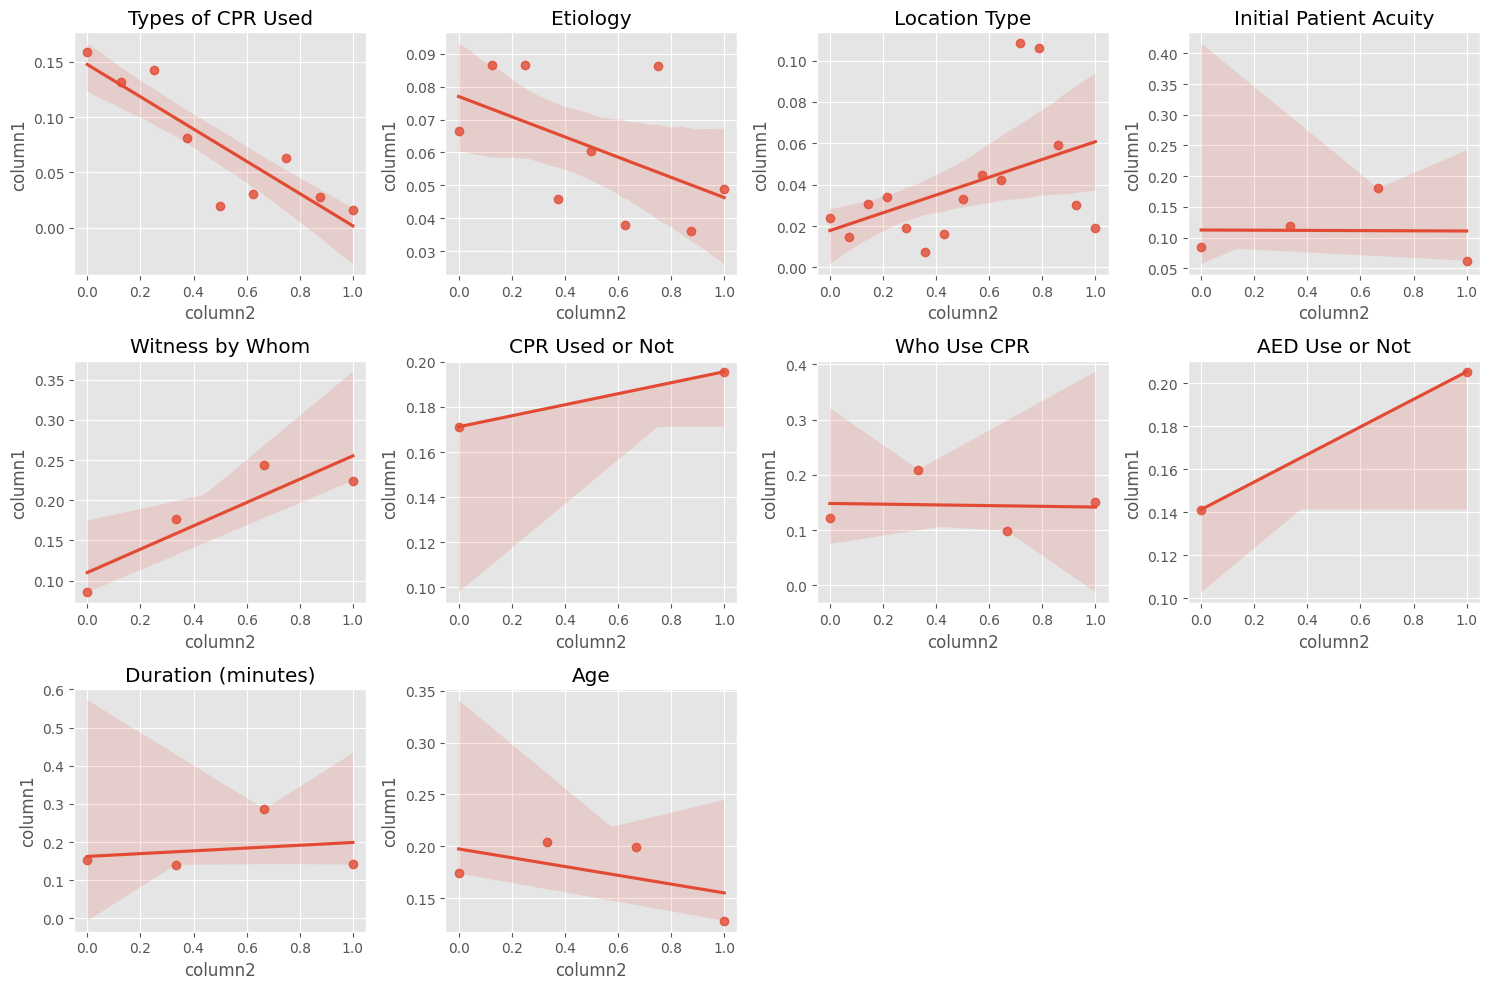

In [108]:
fig, axs = plt.subplots(3, 4, figsize=(15,10))

dataframes = [df_cpr_type, df_etiology, df_location_type, df_acuity, df_witness, df_cpr_used, df_who_cpr, df_aed_used, df_duration, df_age]
titles = ['Types of CPR Used', 'Etiology', 'Location Type', 'Initial Patient Acuity', 'Witness by Whom', 'CPR Used or Not', 'Who Use CPR', 'AED Use or Not', 'Duration (minutes)', 'Age']

for i, df in enumerate(dataframes):
    row = i // 4
    col = i % 4
    sns.regplot(data=df, x="column2", y="column1", ci=90, ax=axs[row, col])
    axs[row, col].set_title(titles[i])

# Remove empty subplots
for i in range(len(dataframes), 12):
    row = i // 4
    col = i % 4
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.savefig('v2_output/global_coefficient_curve.svg', dpi=350, bbox_inches='tight')
plt.show()

In [17]:
summary_coefficient_new={
 'lon': global_importance['summary_importance_continuous_positive']['lon']-global_importance['summary_importance_continuous_negative']['lon'],
 'lat': global_importance['summary_importance_continuous_positive']['lat']-global_importance['summary_importance_continuous_negative']['lat'],
 'Type of CPR Used': cpr_type,
 'Etiology': etiology,
 'location type': location_type,
 'Initial Patient Acuity': acuity,
 'Witness by Whom': witness_by,
 'CPR Used or Not': cpr_used,
 'Who Use CPR': who_cpr,
 'AED Used or Not': aed_used,
 'Age': age,
 'Duration': duration
    
}

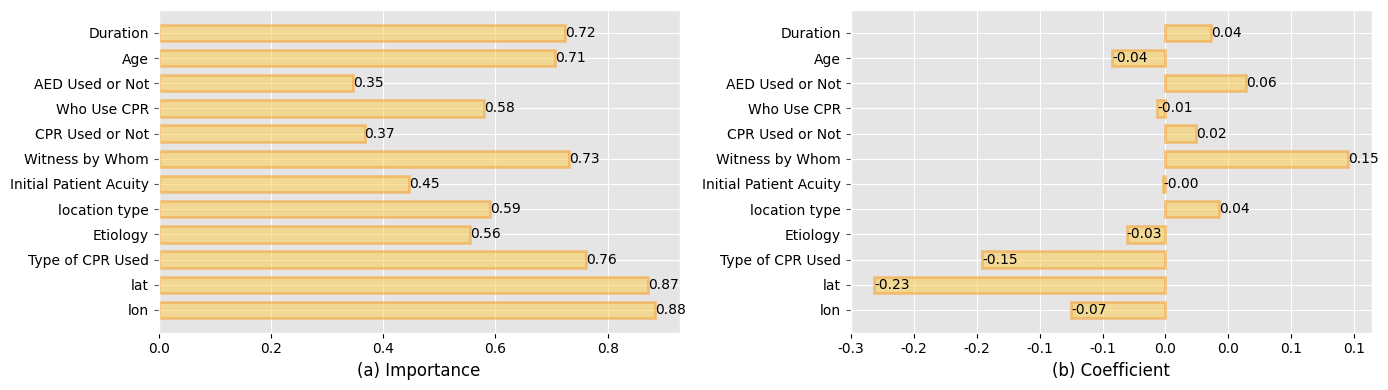

In [19]:
from matplotlib.ticker import FuncFormatter

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

plt.style.use('ggplot') 

# Formatter function
formatter = FuncFormatter(lambda x, pos: f'{x:.1f}')

# First plot
bars=axs[0].barh(range(len(summary_impo_new)), list(summary_impo_new.values()), align='center',color='#fccb45', alpha=0.5, edgecolor='#f79b25', linewidth=2, height=0.65)
axs[0].set_yticks(range(len(summary_impo_new)))
axs[0].set_yticklabels(list(summary_impo_new.keys()), color='black')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].set_xlabel('(a) Importance', color='black')
axs[0].tick_params(axis='x', colors='black')
for bar in bars:
    axs[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

# Second plot
bars=axs[1].barh(range(len(summary_coefficient_new)), list(summary_coefficient_new.values()), align='center',color='#fccb45', alpha=0.5, edgecolor='#f79b25', linewidth=2, height=0.65)
axs[1].set_yticks(range(len(summary_coefficient_new)))
axs[1].set_yticklabels(list(summary_coefficient_new.keys()), color='black')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].set_xlabel('(b) Coefficient', color='black')
axs[1].tick_params(axis='x', colors='black')
for bar in bars:
    axs[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.savefig('v2_output/global_importance_and_coefficient.svg', dpi=350, bbox_inches='tight')
plt.show()